In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


### entropy calculation
def calculateEntropy(X):
    uniq = set(X)
    P = [np.mean(X == x) for x in uniq]
    return sum(-p * np.log2(p) for p in P)


### main calculation step of mutual information


def mutualInfoCalc(img, num_bins):
    top, bottoms = cropImage(img)
    mis = []
    for i in range(len(bottoms)):
        hist = np.histogram2d(np.asarray(top).flatten(), np.asarray(bottoms[i]).flatten(), bins=num_bins)
        hist_img = Image.fromarray(hist[0], 'RGB')
        top_hist = np.histogram(np.asarray(top).flatten(), bins=num_bins)
        bot_hist = np.histogram(np.asarray(bottoms[i]).flatten(), bins=num_bins)
        mis.append(calculateEntropy(top_hist[0]) + calculateEntropy(bot_hist[0]) - calculateEntropy(np.asarray(hist_img).flatten()))
    return mis

### return R,G,B channels of the input image
def splitImage(img):
    split_img = Image.Image.split(img)
    return split_img[0], split_img[1], split_img[2]


### crop red and green channel images according to the assignment's description
def cropImage(img):
    red, green, blue = splitImage(img)
    width, height = img.size
    top = red.crop((20, 0, width-20, height))
    return top, [green.crop((40-x, 0, width-x, height)) for x in range(40, -1, -1)]


### initialize various bin sizes
def binSizeChangeAlt(img):
    top, bottoms = cropImage(img)
    mis = {}
    binses = set([int(256/x) for x in range(1,256)])
    for binss in binses:
        hist = np.histogram2d(np.asarray(top).flatten(), np.asarray(bottoms[20]).flatten(), bins=binss)
        hist_img = Image.fromarray(hist[0], 'RGB')
        top_hist = np.histogram(np.asarray(top).flatten(), bins=binss)
        bot_hist = np.histogram(np.asarray(bottoms[20]).flatten(), bins=binss)
        mi = calculateEntropy(top_hist[0]) + calculateEntropy(bot_hist[0]) - calculateEntropy(np.asarray(hist_img).flatten())
        mis[binss] = mi
    return mis




In [28]:
### calculate mutual information and save plot results
def mutuallInformation(img, img_name):
    fig = plt.figure()
    plt.ylabel('Mutual Information')
    plt.xlabel('Image Translations')
    sns.lineplot(x=[x for x in range(41)], y=mutualInfoCalc(img, 256))
#     translations_outputImgPath = "../output/" + img_name + "_translations"
#     plt.savefig(translations_outputImgPath)

    fig = plt.figure()
    plt.ylabel('Mutual Information')
    plt.xlabel('Number of Bins')
    mis = binSizeChangeAlt(img)
    x, y = zip(*(sorted(mis.items())))
    sns.lineplot(x=x, y=y)
#     binSize_outputImgPath = "../output/" + img_name + "_binSize"
#     plt.savefig(binSize_outputImgPath)


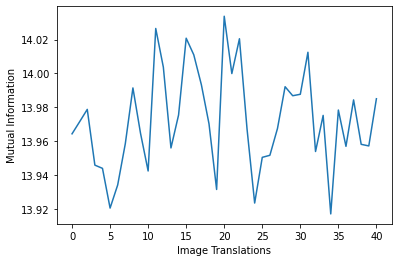

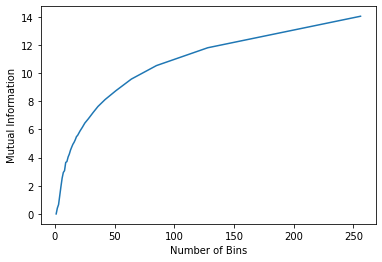

In [29]:
cells_rgb_path = "../input/cells-rgb.jpg"
cells_rgb = Image.open(cells_rgb_path)
mutuallInformation(cells_rgb, "cells-rgb")

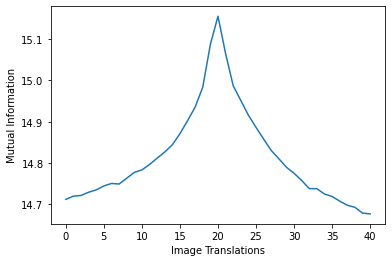

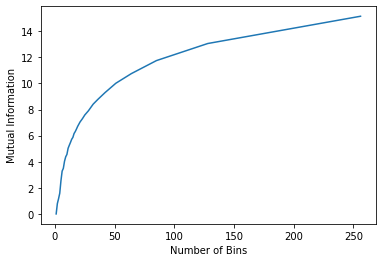

In [30]:
puffin_path = "../input/puffin.jpg"
puffin = Image.open(puffin_path)
mutuallInformation(puffin, "puffin")

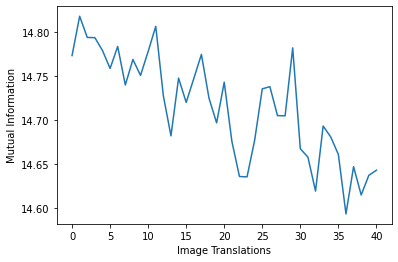

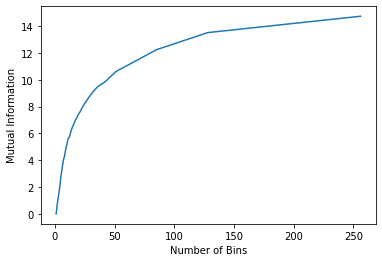

In [31]:
f1_color_path = "../input/f1_color.jpg"
f1_color = Image.open(f1_color_path)
mutuallInformation(f1_color, "f1_color")